<a href="https://colab.research.google.com/github/J0han-ai/fast.ai/blob/main/%D0%BF%D1%82%D0%B8%D1%86%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/Joeclinton1/google-images-download.git


  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-mcs4_ucx
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-mcs4_ucx
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15945 sha256=afd8a3ffff9aa04bb623df18e5721f3e17769a348747209dfa01862150ca480b
  Stored in directory: /tmp/pip-ephem-wheel-cache-opqrb3lt/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


Делаем загрузчик данных.Сразу скачиваем три вида птиц для дальнейшей работы.

In [ ]:
from google_images_download import google_images_download   #importing the library
 
response = google_images_download.googleimagesdownload()   #class instantiation
 
arguments = {"keywords":"синица,соловей,воробей","limit":100,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images



Item no.: 1 --> Item name = \u0441\u0438\u043d\u0438\u0446\u0430
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Parus_major_m.jpg/275px-Parus_major_m.jpg
Completed Image ====> 1.275px-parus_major_m.jpg
Image URL: https://na-zapade-mos.ru/files/data/user/AiF/olga.k/files/2020/2020.12.15-1608065685.4988_bolshaja-sinica.jpg
Completed Image ====> 2.2020.12.15-1608065685.4988_bolshaja-sinica.jpg
Image URL: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/133732751/1800
Completed Image ====> 3.1800.jpg
Image URL: https://simple-fauna.ru/wp-content/uploads/2018/06/sinica.jpg
Completed Image ====> 4.sinica.jpg
Image URL: https://polit.ru/media/photolib/2019/12/28/ps_26194636951_a162f9e263_k_1577550205.jpg
Completed Image ====> 5.ps_26194636951_a162f9e263_k_1577550205.jpg
Image URL: https://krasivosti.pro/uploads/posts/2021-04/1618653964_50-krasivosti_pro-p-seraya-sinitsa-ptitsi-krasivo-foto-53.jpg
Completed Image ====> 6.16186539

In [ ]:
birds_types = 'воробей','синица','соловей'
path = Path('birds')

Присоединяем Гугл Диск

In [ ]:
!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

# Authenticate and create the PyDrive client.
auth.authenticate_user()

!gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' res.png

# if multiple images
# !gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' *.png

Requirement already up-to-date: gupload in /usr/local/lib/python3.7/dist-packages (1.1.0)
Usage: gupload [OPTIONS] [FILES]...
Try "gupload --help" for help.

Error: Invalid value for "[FILES]...": Could not open file: res.png: No such file or directory


Проводим классификацию. Самый простой случай, бинарная классификация.Соловей это или же не соловей


In [ ]:
#импортируем необходимые библиотеки

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from tqdm import tqdm

%matplotlib inline

In [ ]:
#определим устройство, где проводить вычисления (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# необходимо разпаковать датасет в окружение, делается это так:
import zipfile
with zipfile.ZipFile('/content/downloads/соловей.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset/downloads/соловей')

In [ ]:
#функция для вывода изображений
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
#имена классов
classes = ("соловей", "not_соловей")

#путь до датасета
PATH = "/content/dataset/downloads/соловей"

In [ ]:
# распакуем тренировочную выборку для модели "соловей" - 80 процентов от общего
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/content/train/train.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset/downloads/соловей/train')

In [ ]:

#функция для вывода изображений
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
#имена классов
classes = ("соловей", "not_соловей")

#путь до датасета
PATH = "/content/dataset/downloads/соловей/"

In [ ]:
# распакуем валидационную выборку для модели "соловей" - 20 процентов от общего
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/content/train/test.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset/downloads/соловей/test')

In [ ]:
# зададим какие преобразования необходимо сделать с каждым изображением
transform = transforms.Compose(
    [transforms.Resize((64,64)),  #изменим размер изображений
     transforms.ToTensor(),   #переведем в формат который необходим нейронной сети - тензор
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]) # проведем нормализацию изображения

#загружаем тренировочный и тестовый датасеты
trainset = torchvision.datasets.ImageFolder(os.path.join(PATH, "train"), transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, num_workers=0, shuffle=True)

testset = torchvision.datasets.ImageFolder(os.path.join(PATH, "test"), transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=0, shuffle=True)


Real Labels:  соловей соловей соловей соловей


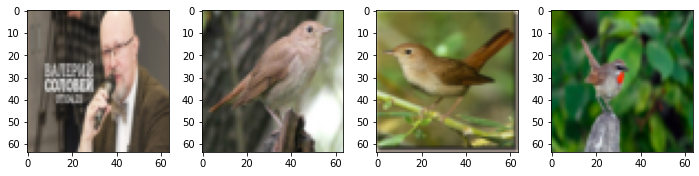

In [ ]:
#Проверим как работает наш загрузчик и посмотрим на парочку изображений
images, labels = next(iter(trainloader))
image_shower(images, labels)

In [ ]:
#загрузим нашу модель.!!transfer learning!!
model = torchvision.models.resnet18(pretrained=True)
#заморозим веса
for param in model.parameters():
    param.require = False

#так как у нас 2 класса, нужно переопределить последний слой сети под нашу задачу
#у предобученной сети было на выходе 1000 классов, поэтому в видео я сказал меняем 1000 на 2
model.fc = nn.Linear(512, 2)

In [ ]:
#Зададим функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

In [ ]:
#Здесь будет тренировка нейронной сети

epochs = 10   #количество эпох (сколько раз будем тренировать)
model.to(device) #переносим нашу модель на GPU

for epoch in range(epochs):
    running_loss = 0.0
    #теперь в цикле проходим по нашему загрузчику данных
    for i, data in tqdm(enumerate(trainloader)):
        #каждый батч тоже помещаем на GPU
        inputs, labels = data[0].to(device), data[1].to(device)
        #сбрасываем накопленный градиент 
        optimizer.zero_grad()
        #прогоняем изображения через модель, чтобы получить предсказание
        outputs = model(inputs)
        #рассчитываем функцию потерь (насколько хорошо предсказали)
        loss = criterion(outputs, labels)
        #считаем градиенты (обратный проход)
        loss.backward()
        #делаем шаг оптимизатора (обновляем веса)
        optimizer.step()

        running_loss += loss.item()

    print ("Epoch {} - Training loss: {} ".format(epoch, running_loss/len(trainloader)))

2it [00:01,  1.93it/s]
0it [00:00, ?it/s]

Epoch 0 - Training loss: 0.4957813173532486 


2it [00:01,  1.96it/s]
0it [00:00, ?it/s]

Epoch 1 - Training loss: 0.24892263859510422 


2it [00:01,  1.95it/s]
0it [00:00, ?it/s]

Epoch 2 - Training loss: 0.06575473211705685 


2it [00:01,  1.97it/s]
0it [00:00, ?it/s]

Epoch 3 - Training loss: 0.021820015739649534 


2it [00:01,  1.94it/s]
0it [00:00, ?it/s]

Epoch 4 - Training loss: 0.011709327343851328 


2it [00:01,  1.89it/s]
0it [00:00, ?it/s]

Epoch 5 - Training loss: 0.004713861388154328 


2it [00:01,  1.95it/s]
0it [00:00, ?it/s]

Epoch 6 - Training loss: 0.0027106517227366567 


2it [00:01,  1.93it/s]
0it [00:00, ?it/s]

Epoch 7 - Training loss: 0.0014532528875861317 


2it [00:01,  1.97it/s]
0it [00:00, ?it/s]

Epoch 8 - Training loss: 0.001137576880864799 


2it [00:01,  1.97it/s]

Epoch 9 - Training loss: 0.001074258761946112 


In [ ]:
#посчитаем точность работы нашего классификатора
correct = 0
total = 0
with torch.no_grad():
    #переводим модель в режим инференса
    model.eval()
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        #получаем наши предсказания
        _, predicted = torch.max(outputs.data, 1)
        #посчитаем общее количество картинок
        total += labels.size(0)
        #посчитаем количество точно классифицированных картинок
        correct += (predicted == labels).sum().item()
print("Accuracy: %d" %(100 * correct/total))


Accuracy: 100


Real Labels:  соловей соловей соловей соловей
Predicted:  соловей соловей соловей соловей


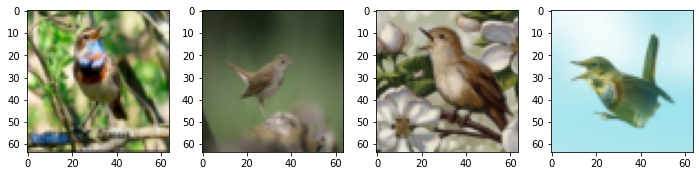

In [ ]:
images, labels = next(iter(testloader))
image_shower(images, labels)

outputs = model(images.to(device))

_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join("%5s" %classes[predict] for predict in predicted[:4]))

Real Labels:  соловей соловей соловей соловей
Predicted:  соловей соловей соловей соловей


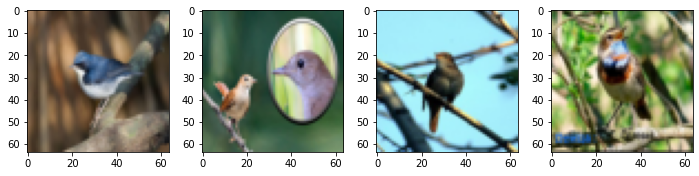

In [ ]:
images, labels = next(iter(testloader))
image_shower(images, labels)

outputs = model(images.to(device))

_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join("%5s" %classes[predict] for predict in predicted[:4]))

In [ ]:
Дальше надо заменить данные в папке тест. убрать соловьев, добавить воробьев
